## 미국 수화 알파벳에는 26개의 문자가 포함되어 있습니다. 이 중 두 개의 문자(j 및 z)에는 동작이 요구되므로 트레이닝 데이터세트에 포함되지 않았습니다.

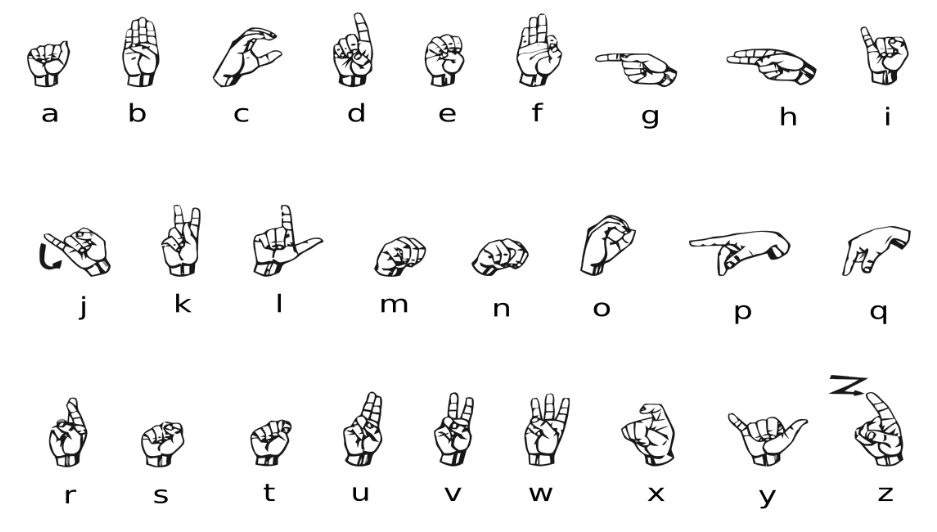

## Data 로드

In [ ]:
import pandas as pd

In [ ]:
# train_df = pd.read_csv("sign_mnist_train.csv")
# valid_df = pd.read_csv("sign_mnist_valid.csv")

In [ ]:
asl_path = "/content/drive/My Drive/datasets/asl/"

In [ ]:
train_df = pd.read_csv(asl_path+"sign_mnist_train.csv")
valid_df = pd.read_csv(asl_path+"sign_mnist_valid.csv")

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,11.679476,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,6.880558,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,12.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,18.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,23.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
# target 분리
y_train = train_df['label']
y_valid = valid_df['label']

In [ ]:
del train_df['label']
del valid_df['label']

In [ ]:
x_train = train_df.values
x_valid = valid_df.values

In [ ]:
print(x_train.shape, x_valid.shape)

(27455, 784) (7172, 784)


In [ ]:
x_train2d = x_train.reshape(-1, 28, 28)
x_valid2d = x_valid.reshape(-1, 28, 28)
print(x_train2d.shape, x_valid2d.shape)

(27455, 28, 28) (7172, 28, 28)


In [ ]:
import matplotlib.pyplot as plt

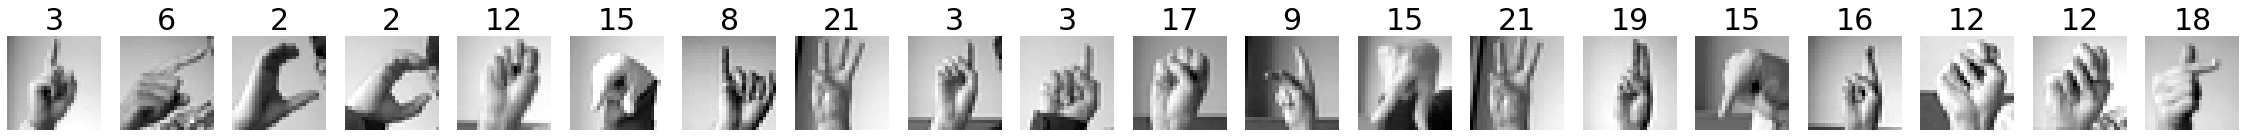

In [ ]:
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

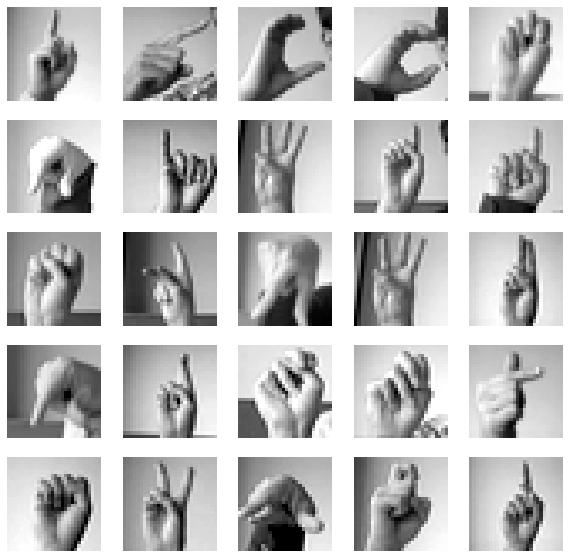

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i in range(5*5):
    image = x_train2d[i]
    ax.flatten()[i].imshow(image, cmap='gray')
    ax.flatten()[i].axis('off')
plt.show()

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [ ]:
import tensorflow.keras as keras

In [ ]:
num_classes=24

In [ ]:
# TODO: Categorically encode y_train and y_valid.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization)

In [ ]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 16s 6ms/step - loss: 0.3022 - accuracy: 0.9052 - val_loss: 0.2589 - val_accuracy: 0.9108
Epoch 2/20
858/858 [==============================] - 5s 6ms/step - loss: 0.0181 - accuracy: 0.9937 - val_loss: 0.3503 - val_accuracy: 0.9028
Epoch 3/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.1254 - val_accuracy: 0.9707
Epoch 4/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.2014 - val_accuracy: 0.9601
Epoch 5/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.3285 - val_accuracy: 0.9446
Epoch 6/20
858/858 [==============================] - 5s 6ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.1853 - val_accuracy: 0.9601
Epoch 7/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.2496 - val_accuracy: 0.9522
Epoch

In [ ]:
prob = model.predict(x_valid[:10])

In [ ]:
import numpy as np

In [ ]:
pred = np.argmax(prob, axis=1)
y = np.argmax(y_valid[:10], axis=1)
print(pred)
print(y)

[ 6  5  9  0  3 20  9 13  3  7]
[ 6  5  9  0  3 20  9 13  3  7]
